# Setup

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import cv2
import pandas as pd
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import image_dataset_from_directory
from keras.applications import ResNet50

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\gener\.keras\datasets\flower_photos


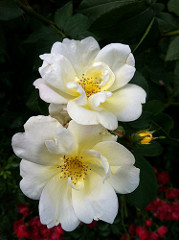

In [4]:
roses = list(data_dir.glob('roses/*'))
# img = cv2.imread(str(roses[100]))
# print(img.shape)
# print(roses[0])
PIL.Image.open(str(roses[0]))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


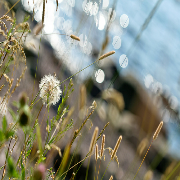

In [5]:
# WATCH VIDEO FOR IMAGE PRE-PROCESSING
# LOOK AT KAGGLE TO SEE HOW IMAGE PRE-PROCESSING IS DONE
# CHAT-GPT

height, width = 180, 180
batch_size = 64
train, validation = image_dataset_from_directory(data_dir, validation_split=0.2, subset="both", seed=123,
                                     label_mode="categorical", image_size=(height,width), batch_size=batch_size)

print(train.class_names)
print(validation.class_names)

for images, labels in train:
    # 'images' is a batch of images, and 'labels' is a batch of corresponding labels.
    # You can work with these batches to process the images and labels.
    # For example, if 'batch_size' is 32, 'images' will have shape (32, height, width, channels),
    # and 'labels' will have shape (32, num_classes), assuming one-hot encoded labels.

    # Iterate over individual images and their labels in the batch.
    for i in range(len(images)):
        img_np = images[i].numpy().astype("uint8")
        pil_image = PIL.Image.fromarray(img_np)
        display(pil_image)
        break
    break

In [6]:
model = Sequential()
pretrained = ResNet50(include_top=False, input_shape=(180,180,3), pooling='avg', classes=5,
                      weights='imagenet')

for layer in pretrained.layers:
    layer.trainable = False

model.add(pretrained)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
# Compile model
# print(tf.config.list_physical_devices('GPU'))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train, validation_data=validation, epochs=10)

# # Load data
# train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3, horizontal_flip=True, vertical_flip=True, zoom_range=0.3)

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(trainPath, target_size=(100,100), batch_size=batchSize, color_mode="rgb", class_mode="categorical", shuffle=True)


# test_generator = test_datagen.flow_from_directory(trainPath, target_size=(100,100), batch_size=batchSize, color_mode="rgb", class_mode="categorical")

# stepsPerEpoch = np.ceil(train_generator.samples / batchSize)
# validationSteps = np.ceil(test_generator.samples / batchSize)

# # Early stopping
# stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)

# history = modelv2.fit(train_generator, steps_per_epoch=stepsPerEpoch, epochs=50, validation_data=test_generator, validation_steps=validationSteps, callbacks=[stop_early])

# modelv2.save(r"C:\Users\gener\OneDrive\Documents\cv-food-app\fruits360Model-v2.h5") 

Epoch 1/10
46/46 [==============================] - 22s 274ms/step - loss: 0.9773 - accuracy: 0.7146 - val_loss: 0.4157 - val_accuracy: 0.8597
Epoch 2/10
46/46 [==============================] - 11s 243ms/step - loss: 0.3138 - accuracy: 0.8917 - val_loss: 0.3569 - val_accuracy: 0.8638
Epoch 3/10
46/46 [==============================] - 12s 248ms/step - loss: 0.1887 - accuracy: 0.9414 - val_loss: 0.3487 - val_accuracy: 0.8774
Epoch 4/10
46/46 [==============================] - 11s 243ms/step - loss: 0.1160 - accuracy: 0.9683 - val_loss: 0.3699 - val_accuracy: 0.8692
Epoch 5/10
46/46 [==============================] - 12s 252ms/step - loss: 0.0903 - accuracy: 0.9758 - val_loss: 0.3730 - val_accuracy: 0.8733
Epoch 6/10
46/46 [==============================] - 11s 234ms/step - loss: 0.0443 - accuracy: 0.9939 - val_loss: 0.3701 - val_accuracy: 0.8869
Epoch 7/10
46/46 [==============================] - 12s 251ms/step - loss: 0.0316 - accuracy: 0.9969 - val_loss: 0.3717 - val_accuracy: 0.8869

<Axes: >

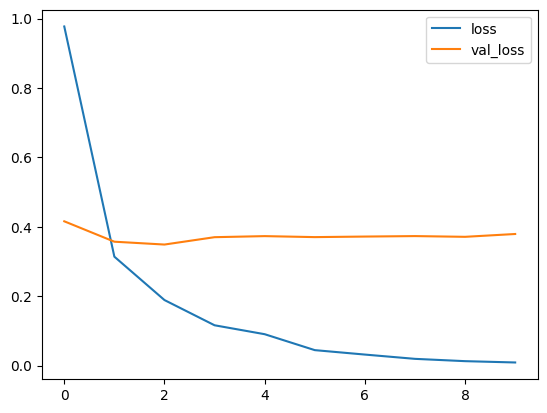

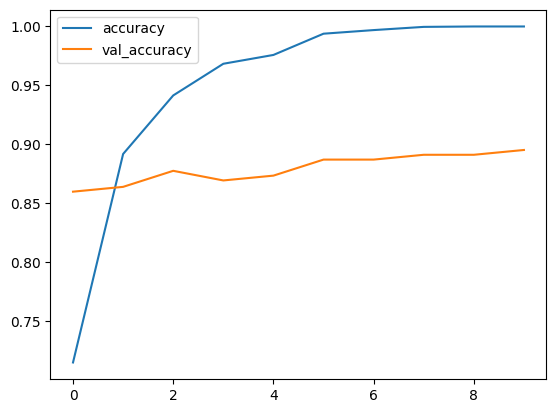

In [13]:
# Plot learning curves
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

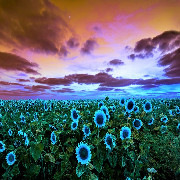

(1, 180, 180, 3)
1/1 [==============================] - 0s 26ms/step
[[9.0847239e-03 1.8250955e-04 3.8256685e-04 9.8931187e-01 1.0383404e-03]]
3
sunflowers


In [30]:
img = cv2.imread(r"C:\Users\gener\OneDrive\Desktop\sunflower.jpg")
img_resized = cv2.resize(img, (height, width))
pil_image = PIL.Image.fromarray(img_resized)
display(pil_image)

img=np.expand_dims(img_resized, axis=0)         # FIGURE OUT WHY WE NEED TO EXPAND DIMS
print(img.shape)


prediction = model.predict(img)
print(prediction)
print(np.argmax(prediction))
print(train.class_names[np.argmax(prediction)])


In [ ]:
model.save(r"C:\Users\gener\OneDrive\Documents\cv-food-app\flowersModel.h5")